In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

## Extract http://bioinfo.cimap.res.in/aromadb/ (AromaDB)

In [32]:
## Get all the aromadb oils from the site
# http://bioinfo.cimap.res.in/aromadb/
# Fianlly data will be in json format having a dictionary of the following format
# OilName:
       # text:
# Constitutents:
    # Name:
    # Qty:

class Oilextractor():
    
    def __init__(self, link):
        self.link  = link
        self.raw_data = []
    
    def getrawdata(self):
        import requests
        print('opening link ' + str(self.link))
        try:
            r  = requests.get(self.link)
        except:
            print('request not completed, cannot open link ' + str(self.link))
        html_doc= r.text
        self.raw_data  = BeautifulSoup(html_doc,'html.parser' )
        print('link opened and data fetched')
    
    def parsedata(self, element_id):
        #print(element_id)
        
        for option in self.raw_data.find_all(element_id):
            #print(option)
            print( 'value: {}, text: {}'.format(option['value'], option.text))
    
    def formatlink(self):
        # format links and return them as list elements
        pass
    
    


In [26]:
Oilextract = Oilextractor(link  = 'http://bioinfo.cimap.res.in/aromadb/')

#print(Oilextract.raw_data)


opening linkhttp://bioinfo.cimap.res.in/aromadb/
link opened and data fetched


In [30]:
Oilextract.getrawdata()

opening linkhttp://bioinfo.cimap.res.in/aromadb/
link opened and data fetched


In [44]:
#Oilextract.parsedata(element_id = 'option' )
#print(data)

divs = Oilextract.raw_data.findAll("div", {"class": "span4"})

# divs[1] has the option and value pair for the plant name

base_link = 'http://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id='
plant_links = []
for option in divs[1].find_all('option'):
    print( 'value: {}, text: {}'.format(option['value'], option.text))
    if option['value'] and option.text:
        link_id  =  option['value']
        plant_link = base_link + link_id
        plant_links.append(plant_link)
print(plant_links)
    


#for div in divs:
	#links = div.find('a').get('href')
	#print(links)

value: , text: Select Plant
value: CRPLT194, text: 
value: CRPLT104, text: Ravensara aromatica
value: CRPLT176, text: Cymbopogon citratus
value: CRPLT197, text: 
value: CRPLT195, text: 
value: CRPLT190, text: 2
value: CRPLT133, text: Aframomum stipulatum
value: CRPLT82, text: Aquilaria sinensis
value: CRPLT159, text: Cassytha filiformis
value: CRPLT86, text: Schinus molle
value: CRPLT61, text: Mentha canadensis
value: CRPLT141, text: Amyris elimifera
value: CRPLT143, text: Anaphalis contorta
value: CRPLT149, text: Arnica montana
value: CRPLT128, text: Acacia caven 
value: CRPLT151, text: Bauhinia ungulata
value: CRPLT20, text: Mentha citrata
value: CRPLT40, text: Phyllanthus amarus
value: CRPLT152, text: Bidens tripartita
value: CRPLT153, text: Bixa orellana
value: CRPLT140, text: Amomum subulatum
value: CRPLT34, text: Hyoscyamus niger
value: CRPLT95, text: Ribes nigrum
value: CRPLT158, text: Caryopteris odorata
value: CRPLT154, text: Callistemon citrinus
value: CRPLT27, text: Bacopa m

In [261]:
def makeOil_links(dataObj = plant_info):
    eoil_linklist = []
    baseoil_link  = 'http://bioinfo.cimap.res.in/aromadb/'
    divs = dataObj.raw_data.findAll("div", {"class": "span8"})
    for div in divs:
        try:
            title = div.span.text.strip() 
            if title == 'Essential Oils':
                tail_link = div.find('a').get('href')
                eoil_link = baseoil_link + tail_link
                eoil_linklist.append(eoil_link)
            else: 
                print('no oil associated')
                pass
        except:
            continue
#print(divs[-3])
#print((divs[-3]. span.text))
    return eoil_linklist

def extract_table(comp):
    trs  = comp.find_all('tr')
    srno = []
    constituents = []
    qty  = []
    
    for j in range(1, len(trs)):
        T = trs[j]
        elements = []
        for el in T('td'):
            data  = el.getText().strip('\n').strip()
            #print(data)
            try:
                data=double(data)
            except:
                pass
            elements.append(data)
        print(elements)    
        srno.append(elements[0])
        constituents.append(elements[1])
        qty.append(elements[2])
        
    return srno, constituents, qty

In [259]:
# dict structure

# OilName:
       # text:
# Constitutents:
    # Name:
    # Qty:
def get_constituents(dataObj = mol_info ):
    ## get the dict which gives the 
    divs = mol_info.raw_data.findAll("div", {"class": "span8"})
   
    Oildata = {}
    constituents = []
    qty = []
    Oildata['oilname'] = {}
    Oildata['constituents'] = {}

# The first div has all the elements
# divs[0] has Essential Oil Details title
# divs[0] has the name of the oil as the title

    title = divs[0].span.text.strip()
    name  = divs[0].find('div', {'class': 'span5'}).text.strip(': ')
    Oildata['oilname']['text'] = name # get the name

## the compound information details are in the two tables major and minor compound details
    for div in divs:
        #print(divs[1])
        try:
            title  = div.span.text.strip()
            if title  == 'Major Compound Details' or title  == 'Minor Compound Details':
                comp = (div.find('table', {'class': 'table table-striped table-bordered table-condensed'})) #Compound  info
                _,c,q   = extract_table(comp)
            #print(c)
                constituents.extend(c)
                qty.extend(q)
            else :
                continue
        except:
            pass
            

    Oildata['constituents']['name'] = constituents
    Oildata['constituents']['qty'] = qty

    return Oildata


In [229]:
# call the links individually now for all the oils and get the raw_data

eoil_linklist = []
for links in plant_links:
    plant_info = Oilextractor(link  = links)
    plant_info.getrawdata()
    eoil_linklist.extend( makeOil_links(plant_info))
    


opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT104
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT176
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT190
link opened and data fetched
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT133
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT82
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT159
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT86
link opened and data fetched
no oil associated
no oil associate

link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT65
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT39
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT130
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT134
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT136
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT92
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_deta

link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT41
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT30
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT75
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT120
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT44
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT45
link opened and data fetched
no oil associated
no oil associated
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail

In [232]:
#links12  = 'http://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT151'
#plant_info1 = Oilextractor(link  = links12)
#plant_info1.getrawdata()


opening linkhttp://bioinfo.cimap.res.in/aromadb/web_plant_detail.php?id=CRPLT151
link opened and data fetched


In [236]:
print(len(eoil_linklist))
print(len(plant_links))
#print((eoil_linklist))

#print(makeOil_links(plant_info1))

122
152


In [263]:
# Now get the molecule info from the links obtained in previous cell 
## list of dictionaries 
Oildata_list = []
for eoil_link in eoil_linklist:
    mol_info = Oilextractor(link  = eoil_link)
    mol_info.getrawdata()
    Oildata = get_constituents(dataObj = mol_info )
    Oildata_list.append(Oildata)
#print(Oildata_list)

opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL166
link opened and data fetched
['1', 'Limonene', '18.9']
['1', 'Methyl Eugenol', '5.2']
['2', 'Linalool', '4.7']
['3', 'Sabinene', '3.9']
['4', '1,8-Cineole', '2.5']
['5', 'Alpha-Terpineol', 'Trace']
['6', 'Citronellal', '0.1']
['7', 'Methyl Chavicol', '0.1']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL196
link opened and data fetched
['1', 'Alpha- Pinene', '11']
['2', 'Beta-Caryophyllene', '8.60']
['3', 'Eugenol', '7.20']
['1', 'P-Cymene', '6.20']
['2', 'Limonene', '4.50']
['3', 'Alpha-Terpineol', '3.30']
['4', 'Thymol', '3.40']
['5', 'Alpha-Thujene', '2.50']
['6', 'Myrcene', '2.70']
['7', 'Beta-Phellandrene', '1.5']
['8', 'Beta-Pinene', '1.40']
['9', '(E)-Beta-Ocimene', '0.20']
['10', '1,8-Cineole', '0.20']
['11', 'Alpha-Terpinene', '0.50']
['12', 'Beta-Humulene', '0.40']
['13', 'Geraniol', '0.20']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essent

link opened and data fetched
['1', '(22)-(6e)-Farnesol', '2']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL203
link opened and data fetched
['1', '1,8-Cineole', '84.50']
['1', 'Alpha-Terpineol', '3.10']
['2', 'Beta-Pinene', '3.40']
['3', 'Alpha- Pinene', '2.30']
['4', 'Alpha-Fenchol', '0.01']
['5', 'Alpha-Terpinyl Acetate', '0.30']
['6', 'Alpha-Thujene', '0.10']
['7', 'Beta-Phellandrene', '0.01']
['8', 'Epi-Alpha-Muurolol', '0.01']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL158
link opened and data fetched
['1', 'Beta-Caryophyllene', '12.90']
['2', 'Alpha-Humulene', '10.20']
['3', 'Hexadecanoic Acid', '10.70']
['4', 'Caryophyllene Oxide', '9.60']
['5', 'Tetradecanoic Acid', '7.20']
['1', 'Humulene Epoxide Ii', '6.50']
['2', 'Dodecanoic Acid', '1.60']
['3', '(E,E)-Farnesol', '0.10']
['4', 'Cis-P-Menth-2-En-1-Ol', 'Trace']
['5', 'Nonanoic Acid', '0.10']
['6', 'A-Eudesmol', '0.30']
['7', 'Cubenol', '0.10']

link opened and data fetched
['1', 'Cis-Alpha-Santalol', '41.1']
['2', 'Cis-Beta-Santalol', '19.8']
['1', '(Z)-Trans-Alpha-Bergamotol', '6.4']
['2', 'Epi-Beta-Santalol', '3.5']
['3', 'Cis-Nuceferol', '3.4']
['4', 'Beta-Santalene', '1.2']
['5', 'Cis-Lanceol', '1.4']
['6', 'Trans-Beta-Santalol', '1.5']
['7', 'Alpha-Santalal', '1.9']
['8', 'Trans-Nuciferol', '0.1']
['9', '(E)-Alpha-Bisabolene', '0.01']
['10', 'Alpha-Santalene', '0.7']
['11', 'Epi-Beta-Bisabolol', '0.7']
['12', '(E)-Beta-Farnesene', '0.01']
['13', 'Ar-Curcumene', '0.3']
['14', 'Epi-Beta-Santalene', '0.8']
['15', '(E)-Gamma-Bisabolene', '0.01']
['16', 'Beta-Bisabolene', '0.1']
['17', '(E)-Nerolidol', '0.1']
['18', 'Beta-Curcumene', '0.2']
['19', 'Epi-Sesquithujene', '0.01']
['20', '(Z)-Gamma-Bisabolene', '0.01']
['21', 'Beta-Elaskene', '0.01']
['22', 'Fokienol', '0.5']
['23', 'Gamma-Curcumene', '0.1']
['24', 'Alpha-Acoradiene', '0.1']
['25', 'Beta-Santalol', '0.6']
['26', 'Santalene', '0.2']
['27', 'Alpha-Bergamotal', '0.1'

link opened and data fetched
['1', 'Linalool', '44.90']
['2', 'Geranyl Acetate', '37.20']
['1', 'Geraniol', '5.20']
['2', 'Beta-Caryophyllene', '2.2']
['3', 'P-Cymene', '2.0']
['4', '(E)-Beta-Ocimene', '1.60']
['5', 'Beta-Caryophyllene Oxide', '1.10']
['6', 'E-E-Alpha-Farnesene', '1.70']
['7', 'Alpha- Pinene', '0.80']
['8', 'Alpha-Thujene', '0.20']
['9', 'Citronellol', '0.20']
['10', 'Citronellyl acetate', '0.40']
['11', 'Delta-3-Carene', '0.50']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL151
link opened and data fetched
['1', 'Camphor', '42.73']
['1', 'Camphene', '6.46']
['2', 'Germacrene-D', '3.03']
['3', '(Z)-Beta-Famesene', '2.52']
['4', 'Alpha-Terpinene', '2.98']
['5', '(E)-Chrysanthenol', '1.42']
['6', 'Gamma-Terpinene', '1.87']
['7', 'Alpha- Pinene', '1.65']
['8', 'Bornyl Acetate', '1.90']
['9', 'P-Cymene', '0.63']
['10', 'Pinocarvone', '0.14']
['11', 'Alpha-Terpineol', '0.17']
['12', 'Sabinene', '0.33']
['13', 'Alpha-Thujene', '0.70']


link opened and data fetched
['1', 'Linalool', '39.30']
['2', 'Dendrolasin', '20.20']
['3', 'Beta-Caryophyllene', '15.70']
['4', 'Benzyl isothiocyanate', '8.70']
['1', 'Germacrene D', '1.70']
['2', '(E)-Nerolidol', '0.10']
['3', 'Phenyl Acetaldehyde', '0.30']
['4', 'A-Cubebene', '0.10']
['5', 'A-Humulene', '0.90']
['6', 'Alpha-Copaene', '0.30']
['7', 'Beta-Cubebene', '0.60']
['8', 'Beta-Elemene', '0.50']
['9', 'Bicyclogermacrene', '0.30']
['10', 'Cis-Linalooloxide (Furanoid)', '0.60']
['11', 'Cumin alcohol', '0.05']
['12', 'Delta-Cadinene', '0.10']
['13', 'Geraniol', '0.10']
['14', 'Nerol', '0.05']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL154
link opened and data fetched
['1', 'Alpha-Pinene', '39.0']
['1', 'Bornyl Acetate', '3.1']
['2', 'Ledol', '3.3']
['3', 'Camphene', '2.1']
['4', 'Allo-Aromadendrene', '1.9']
['5', 'Pinocarveol', '1.9']
['6', 'Terpinen-4-Ol', '1.1']
['7', 'Limonene', '1.7']
['8', 'P-Cymene', '1.7']
['9', 'Cyclosativene', '

link opened and data fetched
['1', 'Alpha-Pinene', '21.8']
['2', 'Beta-Pinene', '17.2']
['3', 'Camphene', '11.3']
['1', '3-hexenol', '8.2']
['2', 'Decanol', '7.2']
['3', 'Limonene', '6.1']
['4', '1,8-Cineole', '5.8']
['5', '2-heptanol', '5.2']
['6', '2-heptenone', '4.7']
['7', 'Benzyl Alcohol', '4.1']
['8', 'Naonanal', '4.3']
['9', '2-methylbutanal', '3.7']
['10', '2-Octanol', '3.3']
['11', '2-phenyl ethanol', '3.5']
['12', 'Isovaleraldehyde', '3.3']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL171
link opened and data fetched
['1', 'Pinocamphone', '49.11']
['1', 'Beta-Pinene', '18.40']
['2', 'Limonene', '5.55']
['3', 'Beta-Phellandrene', '4.15']
['4', 'Alpha- Pinene', '1.80']
['5', 'Sabinene', '1.26']
['6', 'Alpha-Thujene', '1.01']
['7', '(Z,E)-Farnesol', '0.29']
['8', 'Germacrene-D', '0.65']
['9', 'Alpha-Eudesmol', '0.18']
['10', 'Methyl Eugenol', '0.21']
['11', 'Alpha-Humulene', '0.07']
['12', 'Myrtenol', '0.66']
['13', 'Alpha-Terpineol', '0.

link opened and data fetched
['1', 'Geranial', '74.5']
['2', 'Neral', '29.8']
['1', 'Geraniol', '2.7']
['2', '2-Octanone', '1.1']
['3', 'Geranyl Acetate', '1.9']
['4', 'Beta-Selinene', '0.1']
['5', 'Gamma-Gurjunene', '0.1']
['6', 'Alpha- Pinene', '0.1']
['7', 'Camphene', '0.1']
['8', 'Alpha-Amorphene', '0.2']
['9', 'Caryophyllene Oxide', '0.5']
['10', 'Alpha-Bergamotene', '0.3']
['11', 'Cis-Farnesal', '0.2']
['12', 'Humulene Epoxide', '0.1']
['13', 'Alpha-Gurjunene', '0.7']
['14', 'Cis-Linalool Oxide', '0.1']
['15', 'Ledol', '0.1']
['16', 'Alpha-Muurolene', '0.2']
['17', 'Citronellal', '0.7']
['18', 'Limonene', '0.1']
['19', 'Alpha-Muurolol', '0.4']
['20', 'Citronellol', '0.8']
['21', 'Linalool', '0.1']
['22', 'Alpha-Thujene', '0.1']
['23', 'Citronellyl Acetate', '0.2']
['24', 'Myrcene', '0.7']
['25', 'Beta-Bisabolene', '0.2']
['26', 'Delta-Cadinene', '0.2']
['27', 'Rosefuran Epoxide', '0.8']
['28', 'Beta-Caryophyllene', '0.2']
['29', 'Delta-Selinene', '0.1']
['30', 'Trans-Beta-Ocimene

link opened and data fetched
['1', '1,8-Cineole', '21.7']
['2', 'Camphor', '9.0']
['3', 'Heptanal Acid', '8.1']
['1', '3-Methyl-1-Octyn-3-Ol', '3.2']
['2', 'Beta-Caryophyllene', '3.3']
['3', 'Beta-Phellandrene', '2.5']
['4', 'Beta-Pinene', '2.2']
['5', 'Octanal', '2.3']
['6', 'Citronellol', '1.5']
['7', 'Dihydrocarvone', '1.5']
['8', 'Mentha-2,8-Diene', '1.0']
['9', 'Terpinen-4-Ol', '1.1']
['10', 'Alpha-Terpinene', '0.6']
['11', 'Beta-Elemene', '0.9']
['12', 'Myrcene', '0.5']
['13', 'Terpinolene', '0.2']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL149
link opened and data fetched
['1', 'Carvacrol', '77.4']
['1', 'Y-Terpinene', '8.1']
['2', 'P-Cymene', '5.3']
['3', 'Beta-Caryophyllene', '3.0']
['4', 'Trans-Sabinene Hydrate', '2.8']
['5', 'Alpha-Terpinene', '1.3']
['6', 'Myrcene', '1.3']
['7', 'Alpha-Thujene', '0.6']
['8', 'Beta-Phellandrene', '0.2']
['9', 'Thymol', '0.3']
['10', '(E)-Beta-Ocimene', '0.1']
['11', 'Beta-Pinene', '0.1']
['12', 'Tra

link opened and data fetched
['1', 'Methyl Chavicol', '76.6']
['2', '(E)-Anethole', '19.1']
['1', '(E)-Caryophyllene', '0.1']
['2', '(Z)-Anethole', '0.1']
['3', '1-Octanol', 'Trace']
['4', '1-Octen-3-Ol', 'Trace']
['5', 'A-Humulene', 'Trace']
['6', 'Alpha- Pinene', 'Trace']
['7', 'Linalool', '0.1']
['8', 'Pogostol', '0.4']
['9', 'Sabinene', 'Trace']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL261
link opened and data fetched
['1', 'Carvacrol', '59.70']
['2', 'Gamma-Terpinene', '12.80']
['3', 'P-Cymene', '9.30']
['1', 'Alpha-Terpinene', '2.10']
['2', 'Myrcene', '1.10']
['3', 'Eugenol', '1.70']
['4', 'Beta-Bisabolene', '1.10']
['5', 'Beta-Caryophyllene', '1.20']
['6', 'A-Humulene', '0.10']
['7', 'Camphene', '0.10']
['8', 'Allo-Aromadendrene', '0.10']
['9', 'Caryophyllene Oxide', '0.40']
['10', 'Myrtenol', '0.20']
['11', 'Alpha-Copaene', '0.10']
['12', 'Cumin Aldehyde', '0.30']
['13', 'Delta-Cadinene', '0.10']
['14', 'Alpha-Terpineol', '0.20']
['1

link opened and data fetched
['1', 'Carvone', '68']
['2', '1,8-Cineole', '7']
['1', 'Limonene', '2']
['2', 'Cis-Dihydrocarvone', '1.4']
['3', '3-Octanol', '1.7']
['4', 'Trans-Beta-Bergamotene', '1.5']
['5', 'Beta-Caryophyllene', '1.2']
['6', 'Borneol', '1.2']
['7', '(Z)-3-Hexenol', '0.1']
['8', '1-Octen-3-Ol', '0.7']
['9', 'Delta-Cadinene', '0.7']
['10', '2,5-Diethyltetrahydrofuran', '0.3']
['11', 'Sabinene', '0.5']
['12', 'Alpha-Amorphene', '0.5']
['13', 'Alpha-Cubebene', 'Trace']
['14', 'Alpha-Humulene', '0.2']
['15', 'Alpha-Pinene', '0.6']
['16', 'Alpha-Terpineol', '0.5']
['17', 'Beta-Pinene', '0.8']
['18', 'Carvacrol', '0.4']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL232
link opened and data fetched
['1', 'Beta-Caryophyllene', '5.30']
['2', '(E)-Beta-Farnesene', '4.20']
['3', '6,10,14-Trimethylpentadecan-2-one', '4.70']
['4', 'Heptanal Acid', '4.20']
['5', '2-phenyl ethanol', '3.80']
['1', 'Alpha-Cadinol', '3.20']
['2', 'Beta-Bisabolene',

link opened and data fetched
['1', 'Allyl propyl disulfide', '30.60']
['2', 'Diallyl trisulfide', '12.30']
['1', '(E)-2-Hexenal', '0.40']
['2', '3,4-Dimethylthiophene', '0.40']
['3', 'Dimethyl disulfide', '0.30']
['4', 'Palmitic Acid', '0.10']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL262
link opened and data fetched
['1', 'Beta-Caryophyllene', '45.80']
['2', 'Germacrene D', '14.40']
['1', 'A-Humulene', '8.80']
['2', '(E)-Beta-Farnesene', '5.10']
['3', 'Delta-Cadinene', '5.70']
['4', 'Farnesol', '5.30']
['5', 'Alpha-Copaene', '4.10']
['6', 'Hexadecanoic Acid', '4.20']
['7', 'Eugenol', '2.10']
['8', 'Nerolidol', '2.30']
['9', 'Linalool', '0.40']
opening linkhttp://bioinfo.cimap.res.in/aromadb/web_essentialoil_details.php?id=CRESOL142
link opened and data fetched
['1', 'Epicurzerenone', '24.01']
['2', 'Curzerene', '10.36']
['1', 'Spathulenol', '2.95']
['2', '1, 8-Cineole', '1.99']
['3', 'Camphor', '1.72']
['4', 'Alpha-Humulene', '1.01']
['5', '

In [265]:
print(len(Oildata_list))

122


In [264]:
## write data to file

import json
with open('Oildata.json', 'a+') as fp:
    json.dump(Oildata_list, fp)
    
## read the data entered
    
with open('Oildata.json', 'r') as fp:
    data = json.load(fp)

print(data)

[{'oilname': {'text': 'Ravensara aromatica essential oil'}, 'constituents': {'name': ['Limonene', 'Methyl Eugenol', 'Linalool', 'Sabinene', '1,8-Cineole', 'Alpha-Terpineol', 'Citronellal', 'Methyl Chavicol'], 'qty': ['18.9', '5.2', '4.7', '3.9', '2.5', 'Trace', '0.1', '0.1']}}, {'oilname': {'text': 'Aframomum stipulatum'}, 'constituents': {'name': ['Alpha- Pinene', 'Beta-Caryophyllene', 'Eugenol', 'P-Cymene', 'Limonene', 'Alpha-Terpineol', 'Thymol', 'Alpha-Thujene', 'Myrcene', 'Beta-Phellandrene', 'Beta-Pinene', '(E)-Beta-Ocimene', '1,8-Cineole', 'Alpha-Terpinene', 'Beta-Humulene', 'Geraniol'], 'qty': ['11', '8.60', '7.20', '6.20', '4.50', '3.30', '3.40', '2.50', '2.70', '1.5', '1.40', '0.20', '0.20', '0.50', '0.40', '0.20']}}, {'oilname': {'text': 'Aquilaria sinensis essential oil'}, 'constituents': {'name': ['Baimuxinal', 'Alpha-Selinene', 'A-Humulene', 'Caryophyllene Oxide', 'Gamma-Eudesmol', '1-Epi-Cubenol', 'A-Eudesmol', 'Beta-Santalol', 'Elemol', 'Spathulenol', 'Decanal', 'Docosa

In [201]:
#print(mol_info.raw_data)

############################################# Trial #############################################


#print(divs)
for div in divs:
    try:
        #print(div)
        title = div.span.text.strip()
        title2  = div.find('div', {'class': 'span5'}).text.strip(': ')
        #print(title)
        #print(title2)
        
    except:
        continue
#print((divs[0]))
title = divs[0].span.text.strip()
title2  = divs[0].find('div', {'class': 'span5'}).text.strip(': ')
#print(title)
#print(title2)
        
comp = (divs[0].findAll('table', {'class': 'table table-striped table-bordered table-condensed'}))[0] #Compound 
print(comp)
#comp.find_all('td')
#a = {}
#tabledata = [td.getText().strip('\n') for td in comp('td')]                         
#print(tabledata)
#print(len(rows))
trs  = comp.find_all('tr')
for j in range(1, len(trs)):
    T = trs[j]
    #print(type(T))
    elements = []
    for el in T('td'):
        elements.append(el.getText()) 
        #print((el.getText()))
        
    print(elements[1], elements[2])

        
          
    #print(cells[0].get_text())
    #print(cells[1].get_text())
    #print(cells[2].get_text())
############################################# Trial #############################################


<table class="table table-striped table-bordered table-condensed"> <thead><tr><th>Serial No.</th><th>Compound Name </th><th>Compound Percentage(%)</th></tr></thead><tbody><tr><td>1</td><td><a href="web_compound_detail.php?id=CRMOL230">Limonene</a>
</td><td>18.9</td></tr></tbody></table>
Limonene
 18.9


## Extract http://www.nipgr.ac.in/Essoildb/ (EssentialOilDB)

We have the data(done by Rishemjit Kaur using scrapy) read from the csv file and keep it in proper format 

In [29]:
EsOilDB  = pd.read_csv('./EssentialOilNIPGR/EssentialOil.csv', encoding = "utf-8")

EsOilDB.head()

,Plant_name,Compound_name,Plant_part,Chemical_classification,Percentage
0,Acalypha segetalis,"1,8-cineole",leaf,monoterpene derivative,16.2
1,Acalypha segetalis,alpha-humulene,leaf,sesquiterpene,4.4
2,Acalypha segetalis,alpha-pinene,leaf,monoterpene,29.8
3,Acalypha segetalis,alpha-terpineol,leaf,monoterpene alcohol,0.9
4,Acalypha segetalis,beta-caryophyllene,leaf,sesquiterpene,6.2


In [33]:
print(EsOilDB.shape)
EsOilDB = EsOilDB.dropna(how = 'all')
print(EsOilDB.shape)
f  = lambda x: x.strip() 
EsOilDB['Plant_name'] =  EsOilDB['Plant_name'].apply(f)

(134176, 5)
(134176, 5)


In [36]:
gb = EsOilDB.groupby('Plant_name')    
print(len(gb.groups))
EsOilgb  = [gb.get_group(x) for x in gb.groups]
EsOilgb[0]
#print(gb.groups.keys())


1644


,Plant_name,Compound_name,Plant_part,Chemical_classification,Percentage
118,Abies alba,(5.9-10)-kaur-15-ene,leaf,NaN,0.1
119,Abies alba,alpha-fenchol,leaf,alcohol,0.1
120,Abies alba,alpha-fenchyl acetate,leaf,NaN,14.2
121,Abies alba,alpha-humulene,leaf,sesquiterpene,1.9
122,Abies alba,alpha-ionone,leaf,NaN,0.4
123,Abies alba,alpha-phellandrene,leaf,cyclic monoterpene,0.9
124,Abies alba,alpha-pinene,leaf,monoterpene,10.9
125,Abies alba,alpha-terpinene,leaf,monoterpene,0.2
126,Abies alba,alpha-terpineol,leaf,monoterpene alcohol,0.2
127,Abies alba,alpha-terpinyl acetate,leaf,monoterpene,0.4


In [49]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

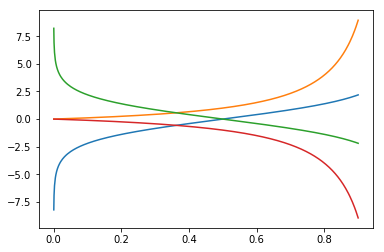

In [74]:
x1  = np.sort(np.random.uniform(0,0.9, 2000 ))
f = (x1/(1-x1))
y1 = np.log(f) 
y2 = -y1
fn = -f
plt.plot(x1,y1)
plt.plot(x1,f)
plt.plot(x1,y2)
plt.plot(x1,fn)

In [29]:
## KCC data links

import bs4 as bs
import urllib.request
import json
import re
import os
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException



def start_request(url): 
    try:
        driver = webdriver.Firefox(executable_path = r'./geckodriver')
        driver.get(url)
        delay  = 7 # seconds
    #html = driver.execute_script("return document.documentElement.innerHTML")
        try:
            myElem = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'csv')))
            print('Page is ready!')
        except TimeoutException:
            print('Loading took too much time!')
            driver.close()
            return None
        except Exception as ex:
            template = 'An exception of type {0} occurred. Arguments:\n{1!r}'
            message = template.format(type(ex).__name__, ex.args)
            print(message)
            driver.close()
            return None
        elem = driver.find_element_by_xpath('//*')
        html = elem.get_attribute('outerHTML')
    except:
        print('error executing the script or opening the link')
        driver.close()
        return None
    soup = BeautifulSoup(html)
    driver.close()
    return soup



def retrieve_data(soups, path):
    print('called retrieve data')
    if soups is None:
        print('no html to parse')
        return None
            
    trs  = soups.find_all('a',class_= 'csv')
    if trs is None:
        print('No csv element found')
        return soups
    for tr in trs:
        print(tr)
        a = tr.get('href')
        b  = a.split('/')
        #print(b)
        file_name  = path + b[4] + '.csv'
        #print(file_name)
        print(a)
        try:
            if (os.path.isfile(file_name)):
                print('no need to download ', file_name)
                pass
            else:
                urllib.request.urlretrieve(a, file_name)
                pass
        except:
            not_opened.append(a)
            pass
     #print(urllist)
    return soups
  
def get_nextpage(urlbeg,soupf):
    print('called next page')
    #print(soup)
    if soupf is None:
        print('no html to parse')
        return None
    #trs = soupf.find_all(lambda tr: tr.name == 'li' and tr.class_ == ['pager-next'])
    trs = soupf.find_all('li', class_ = 'pager-next')
   # print(trs)
    if trs == []:
        print('No next page')
        return None
    for tr in trs:
        print(tr)
        fl  = tr.a.get('href')
        if fl == '#':
            return None
        fsp = fl.split('/')
        #print(fsp)
       
        link  = urlbeg + fsp[4]
        print(link)
        
        try:
            soupl = start_request(link)
            
        except:
            print('error executing the script or opening the link')
            continue
        
        return soupl
        


#import csv

#with open('KCC_name.csv', 'a+' ) as file_name:
#    wr = csv.writer(file_name, delimiter = ',')
#    wr.writerow(urllist)



In [30]:
import time
urlbeg = 'https://data.gov.in/catalog/district-wise-and-month-wise-queries-farmers-kisan-call-centre-kcc-during-2019'

urlvar = '?filters%5Bfield_catalog_reference%5D=6607206&json&offset=6960&limit=6&sort%5Bcreated%5D=desc'
url = urlbeg + urlvar 
print(url)
dat_save_path = 'dataKCC_2019/'
#sauce  = urllib.request.urlopen(url)
urllist = []
  
not_opened = []

soup = start_request(url)
soupdat = retrieve_data(soup,dat_save_path )
soupnext = get_nextpage(urlbeg, soupdat)

while soupnext:     
    soupdat = retrieve_data(soupnext, dat_save_path )
    time.sleep(3)
    if soupdat:
        soupnext = get_nextpage(urlbeg, soupdat)
    else:
        print('no soup!!')
        continue

#if driver: driver.close()
print('done')

https://data.gov.in/catalog/district-wise-and-month-wise-queries-farmers-kisan-call-centre-kcc-during-2019?filters%5Bfield_catalog_reference%5D=6607206&json&offset=6960&limit=6&sort%5Bcreated%5D=desc
Page is ready!
called retrieve data
<a class="csv" href="https://data.gov.in/node/6607339/datastore/export/csv" target="_blank" title="csv"><img src="https://data.gov.in/sites/all/themes/ogplv3light/images/iconset/csv.gif"/></a>
https://data.gov.in/node/6607339/datastore/export/csv
no need to download  dataKCC_2019/6607339.csv
<a class="csv" href="https://data.gov.in/node/6607352/datastore/export/csv" target="_blank" title="csv"><img src="https://data.gov.in/sites/all/themes/ogplv3light/images/iconset/csv.gif"/></a>
https://data.gov.in/node/6607352/datastore/export/csv
no need to download  dataKCC_2019/6607352.csv
<a class="csv" href="https://data.gov.in/node/6607356/datastore/export/csv" target="_blank" title="csv"><img src="https://data.gov.in/sites/all/themes/ogplv3light/images/iconset/